In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]= (20,10)

In [2]:
df = pd.read_csv("USA_House.csv")
df.head()

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813,Century 21 Bravo Realty
1,30 Mahogany Mews SE #415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029,Century 21 Bamber Realty Ltd.
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545,Exp Realty
3,235 15 Ave SW #404,280000,CA AB T2R 0P6,Beltline,2,2.0,898,RE/MAX Realty Professionals
4,24 Hemlock Crescent SW #2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482,Charles


In [3]:
#Drop Variabel Data yang tidak penting yaitu Website dan address
df1= df.drop(['Description','Address','Website'],axis='columns')
df1.head()

,Price,Place,Beds,Bath,Sq.Ft
0,979999,Glenbrook,4,3.5,1813
1,439900,Mahogany,2,2.0,1029
2,950000,Auburn Bay,4,2.5,2545
3,280000,Beltline,2,2.0,898
4,649000,Spruce Cliff,2,2.0,1482


In [4]:
#Mencari data null
df1.isnull().sum()

Price     0
Place    16
Beds      0
Bath      0
Sq.Ft     0
dtype: int64

In [5]:
#Bersihkan Data Null
df2= df1.dropna()
df2.isnull().sum()

Price    0
Place    0
Beds     0
Bath     0
Sq.Ft    0
dtype: int64

In [6]:
df2.shape

(3344, 5)

In [7]:
df2 = df2.rename(columns={'Sq.Ft': 'Sqft'})

In [8]:
df2.head()

,Price,Place,Beds,Bath,Sqft
0,979999,Glenbrook,4,3.5,1813
1,439900,Mahogany,2,2.0,1029
2,950000,Auburn Bay,4,2.5,2545
3,280000,Beltline,2,2.0,898
4,649000,Spruce Cliff,2,2.0,1482


In [9]:
df2.shape

(3344, 5)

In [10]:
#Feature Engineering Cari harga per sq feet
df3= df2.copy()
df3['Price_per_Sqft'] = df3['Price']/df3['Sqft']
df3.head()

,Price,Place,Beds,Bath,Sqft,Price_per_Sqft
0,979999,Glenbrook,4,3.5,1813,540.539989
1,439900,Mahogany,2,2.0,1029,427.502430
2,950000,Auburn Bay,4,2.5,2545,373.280943
3,280000,Beltline,2,2.0,898,311.804009
4,649000,Spruce Cliff,2,2.0,1482,437.921727


In [11]:
len(df3.Place.unique())

308

In [12]:
df3.Place = df3.Place.apply(lambda x: x.strip())
Place_stats = df3.groupby('Place')['Place'].agg('count').sort_values(ascending=False)
Place_stats

Place
Beltline                     155
Saddle Ridge                  72
Legacy                        60
Mahogany                      56
Cranston                      54
                            ... 
Fresco Gardens - Taradale      1
Riverside Gate                 1
Georgian Village               1
Rideau Park                    1
Zen In Aspen                   1
Name: Place, Length: 308, dtype: int64

In [13]:
len(Place_stats[Place_stats<=5])

140

In [14]:
#Mencari tempat yang jumlahnya kurang dari atau sama dengan 5
Place_stats_less_than_5 = Place_stats[Place_stats<=5]
Place_stats_less_than_5

Place
Riverbend                    5
Abbeydale                    5
Elboya                       5
Lincoln Park                 5
Coach Hill                   5
                            ..
Fresco Gardens - Taradale    1
Riverside Gate               1
Georgian Village             1
Rideau Park                  1
Zen In Aspen                 1
Name: Place, Length: 140, dtype: int64

In [15]:
len(df3.Place.unique())

308

In [16]:
df3.Place = df3.Place.apply(lambda x: 'Other' if x in Place_stats_less_than_5 else x)
len(df3.Place.unique())

169

In [17]:
#Mencari luas pertempat tidur dibawah 300 
df3[df3.Sqft/df3.Beds<300].head()

,Price,Place,Beds,Bath,Sqft,Price_per_Sqft
5,434900,Other,6,2.0,1059,410.670444
7,499900,Southwood,4,2.0,1133,441.218005
23,519900,Penbrooke Meadows,5,2.5,1193,435.792121
31,849000,Bankview,5,2.0,1086,781.767956
33,639900,Mahogany,6,5.0,1762,363.166856


In [18]:
df3.shape

(3344, 6)

In [19]:
df4= df3[~(df3.Sqft/df3.Beds<300)]
df4.shape

(3025, 6)

In [20]:
df4.Price_per_Sqft.describe()

count    3025.000000
mean      463.998857
std       214.107395
min        42.744742
25%       356.292646
50%       411.492281
75%       522.315086
max      5485.232068
Name: Price_per_Sqft, dtype: float64

In [21]:
def remove_price_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Place'):
        m= np.mean(subdf.Price_per_Sqft)
        st= np.std(subdf.Price_per_Sqft)
        reduced_df = subdf[(subdf.Price_per_Sqft>(m-st))&(subdf.Price_per_Sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df5 = remove_price_outliers(df4)
df5.shape

(2199, 6)

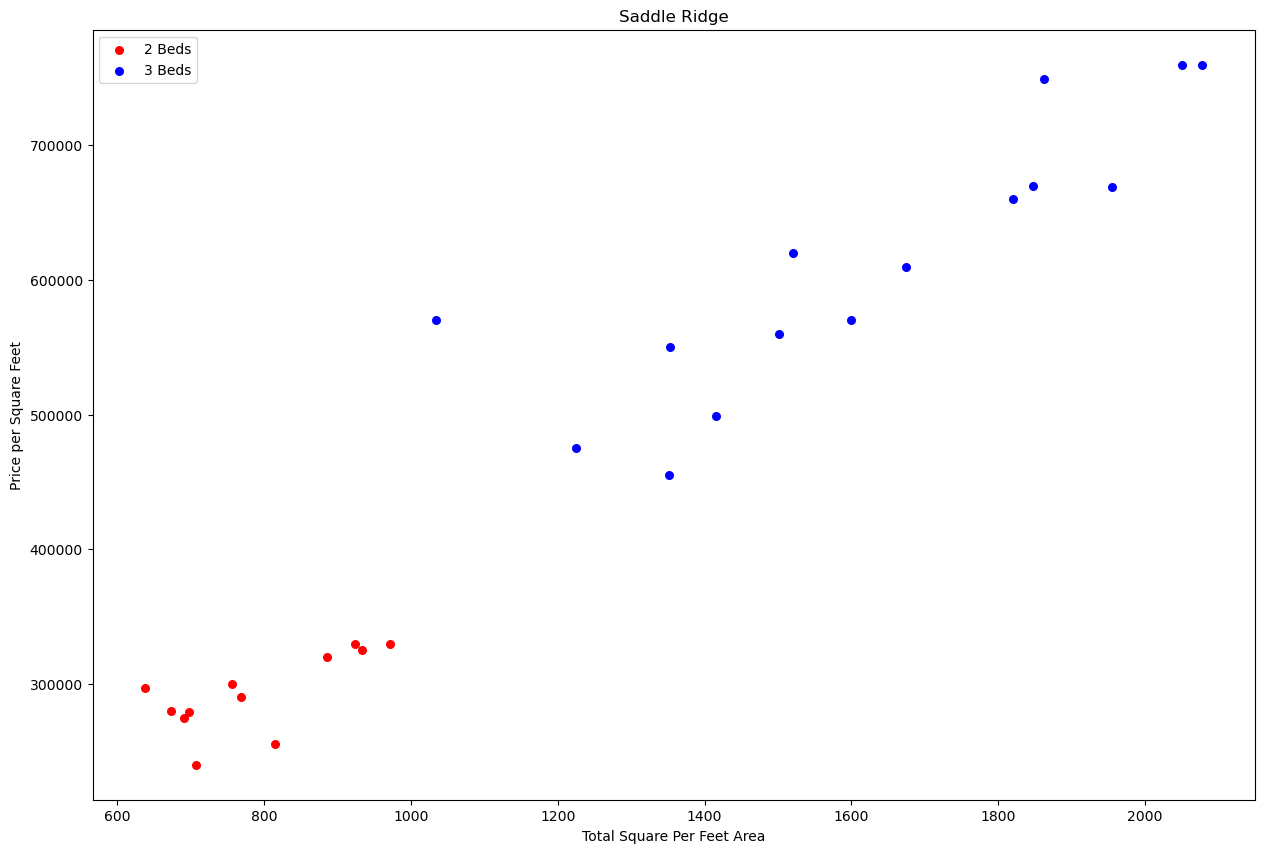

In [22]:
def plot_scatter_chart(df,Place):
    Beds2= df[(df.Place==Place) & (df.Beds==2)]
    Beds3= df[(df.Place==Place) & (df.Beds==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(Beds2.Sqft,Beds2.Price, color='red', label= '2 Beds', s=30)
    plt.scatter(Beds3.Sqft,Beds3.Price, color='blue', label= '3 Beds', s=30)
    plt.xlabel("Total Square Per Feet Area")
    plt.ylabel("Price per Square Feet")
    plt.title(Place)
    plt.legend()

plot_scatter_chart(df5,"Saddle Ridge")

In [23]:
def remove_beds_outliers(df):
    exclude_indices = np.array([])
    for Place, Place_df in df.groupby('Place'):
        Beds_stats = {}
        for Beds, Beds_df in Place_df.groupby('Beds'):
            Beds_stats[Beds] = {
                'mean': np.mean(Beds_df.Price_per_Sqft),
                'std': np.std(Beds_df.Price_per_Sqft),
                'count': Beds_df.shape[0]
            }
        for Beds, Beds_df in Place_df.groupby('Beds'):
            stats = Beds_stats.get(Beds-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, Beds_df[Beds_df.Price_per_Sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_beds_outliers(df5)

df6.shape

(1762, 6)

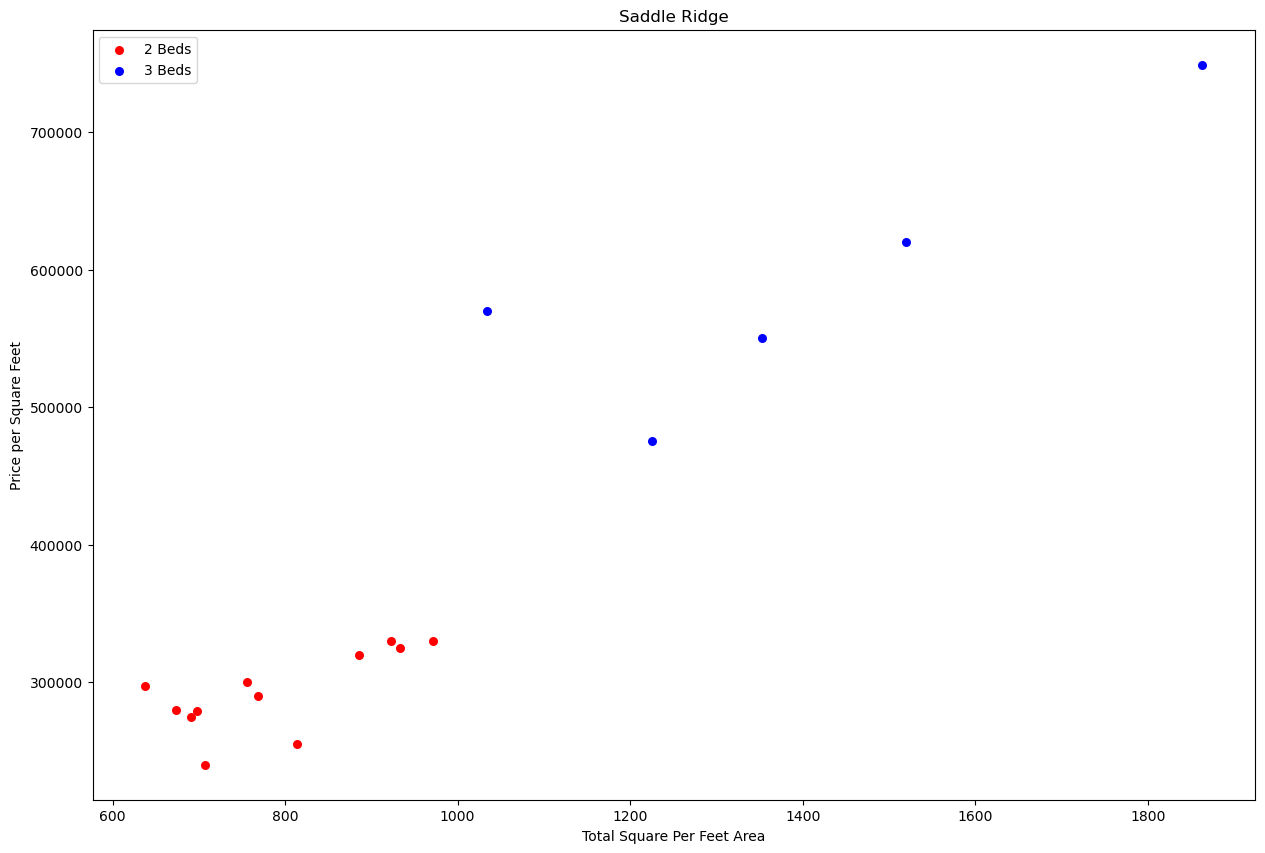

In [24]:
plot_scatter_chart(df6,"Saddle Ridge")

Text(0, 0.5, 'Count')

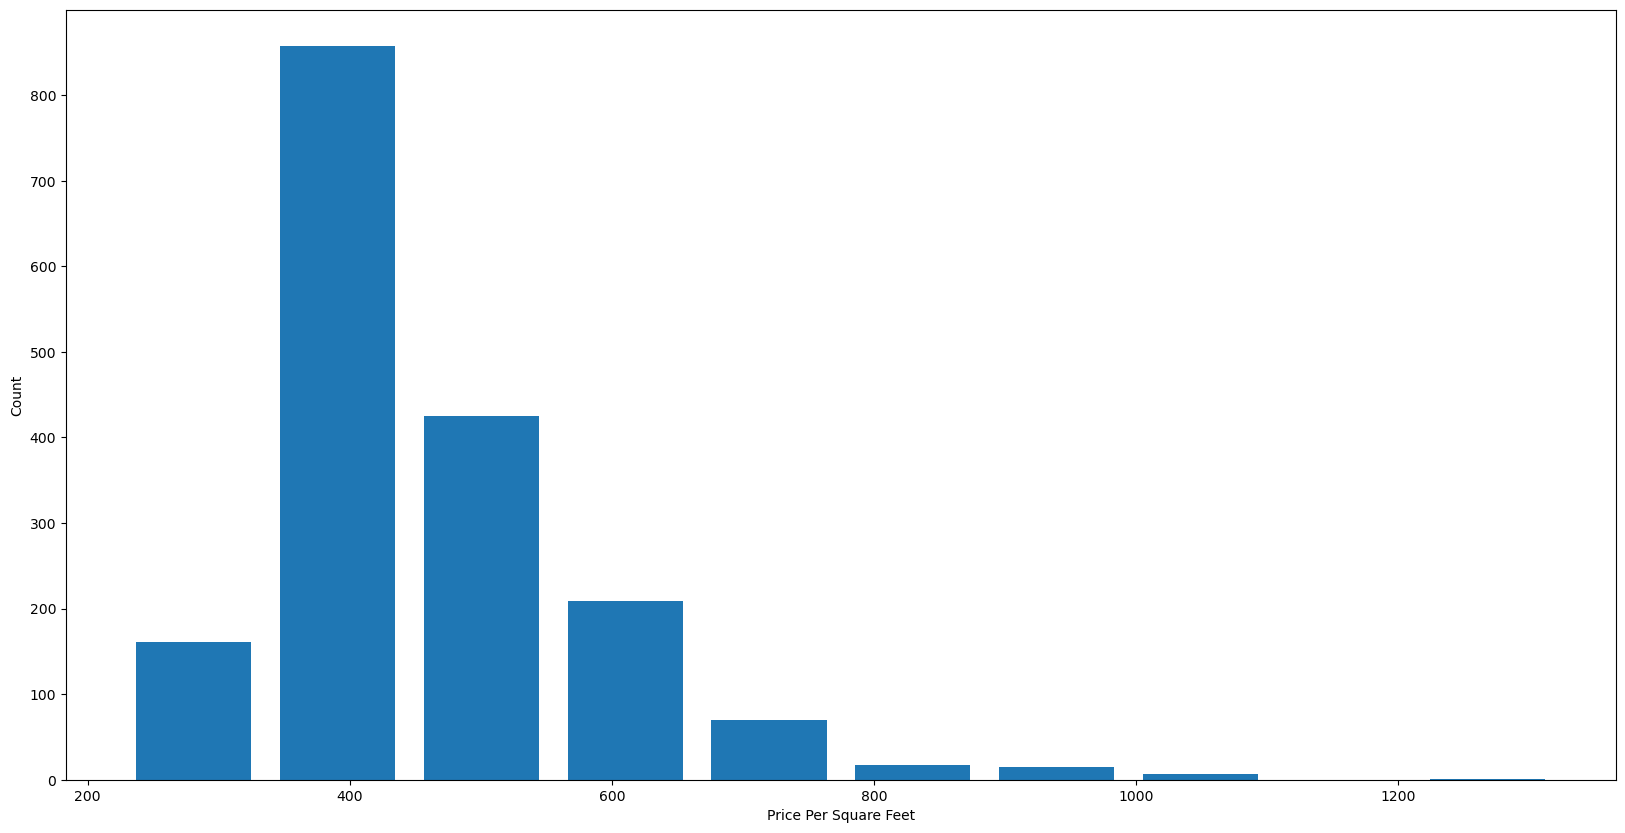

In [25]:
import matplotlib
matplotlib.rcParams["figure.figsize"]= (20,10)
plt.hist(df6.Price_per_Sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

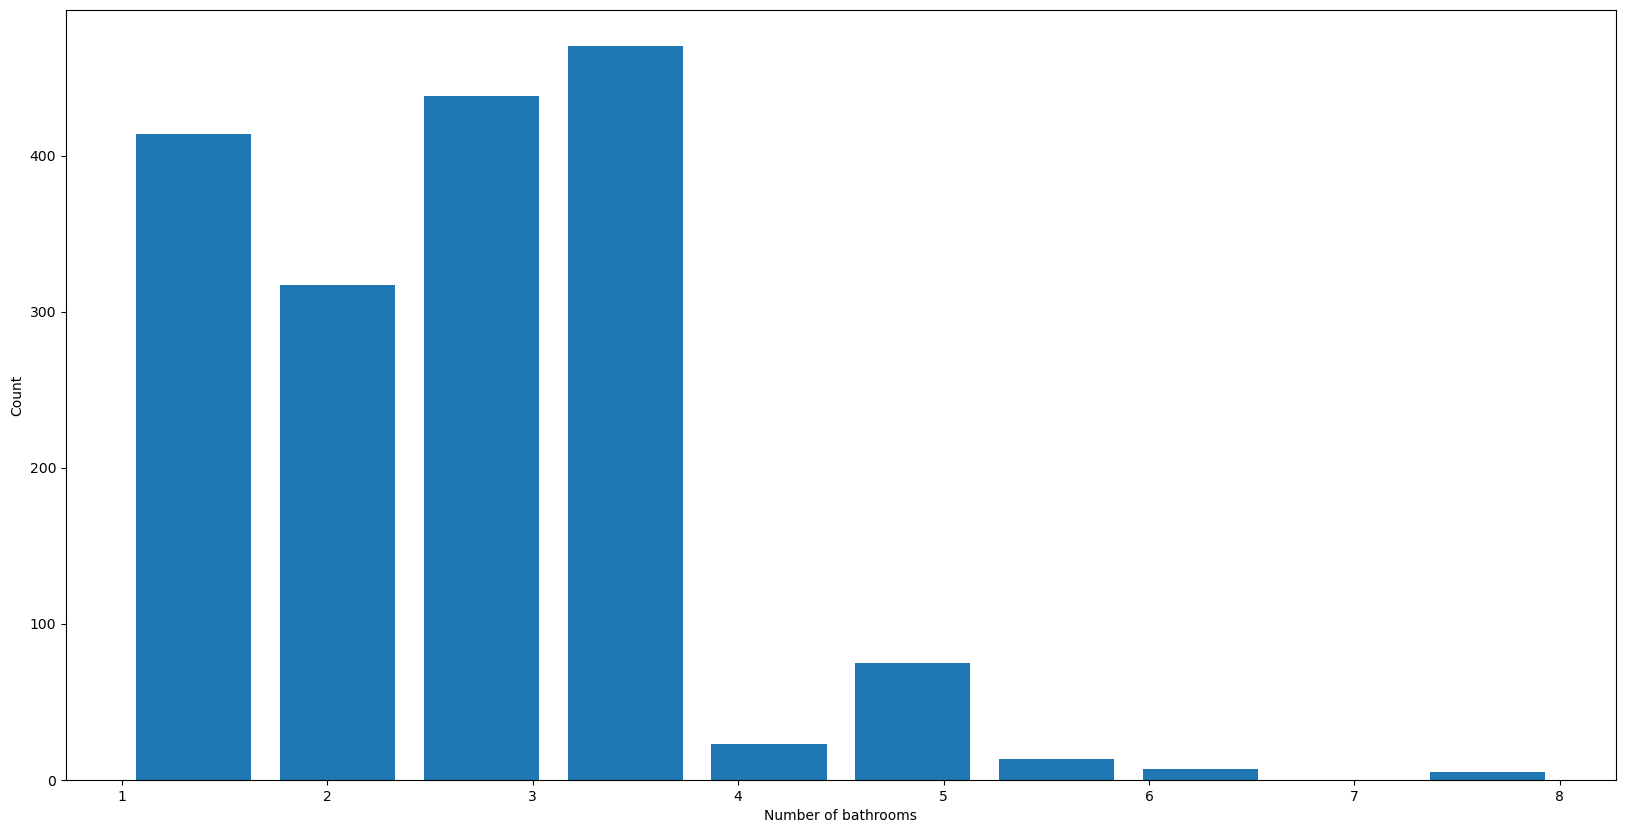

In [26]:
plt.hist(df6.Bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [27]:
df7 = df6[df6.Bath<df6.Beds+2]
df7.shape

(1760, 6)

In [28]:
df7.head()

,Price,Place,Beds,Bath,Sqft,Price_per_Sqft
0,550000,Acadia,3,1.5,1068,514.981273
1,699900,Acadia,3,3.5,1127,621.029281
2,271000,Albert Park/Radisson Heights,2,2.0,764,354.712042
3,290000,Albert Park/Radisson Heights,2,2.0,916,316.593886
4,549900,Alpine Park,4,1.5,1503,365.868263


In [29]:
df8= df7.drop(['Price_per_Sqft'],axis='columns')
df8.head()
df8

,Price,Place,Beds,Bath,Sqft
0,550000,Acadia,3,1.5,1068
1,699900,Acadia,3,3.5,1127
2,271000,Albert Park/Radisson Heights,2,2.0,764
3,290000,Albert Park/Radisson Heights,2,2.0,916
4,549900,Alpine Park,4,1.5,1503
...,...,...,...,...,...
2194,709900,Yorkville,3,2.5,1913
2195,859990,Yorkville,4,2.5,2355
2196,589900,Yorkville,3,2.5,1639
2197,712990,Yorkville,3,2.5,1879


In [30]:
dummies= pd.get_dummies(df8.Place)
dummies.head(3)

,Acadia,Albert Park/Radisson Heights,Alpine Park,Altadore,Ambleton,Applewood Park,Arbour Lake,Aspen Woods,Auburn Bay,Banff Trail,...,Walden,West Hillhurst,West Springs,Whitehorn,Willow Park,Windsor Park,Winston Heights/Mountview,Woodbine,Woodlands,Yorkville
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
df9= pd.concat([df8,dummies.drop('Other', axis='columns')],axis='columns')
df9.head(3)

,Price,Place,Beds,Bath,Sqft,Acadia,Albert Park/Radisson Heights,Alpine Park,Altadore,Ambleton,...,Walden,West Hillhurst,West Springs,Whitehorn,Willow Park,Windsor Park,Winston Heights/Mountview,Woodbine,Woodlands,Yorkville
0,550000,Acadia,3,1.5,1068,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,699900,Acadia,3,3.5,1127,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,271000,Albert Park/Radisson Heights,2,2.0,764,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
df10= df9.drop('Place', axis='columns')
df10.head(3)

,Price,Beds,Bath,Sqft,Acadia,Albert Park/Radisson Heights,Alpine Park,Altadore,Ambleton,Applewood Park,...,Walden,West Hillhurst,West Springs,Whitehorn,Willow Park,Windsor Park,Winston Heights/Mountview,Woodbine,Woodlands,Yorkville
0,550000,3,1.5,1068,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,699900,3,3.5,1127,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,271000,2,2.0,764,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
df10.shape

(1760, 172)

In [34]:
X = df10.drop('Price',axis='columns')
X.head()

,Beds,Bath,Sqft,Acadia,Albert Park/Radisson Heights,Alpine Park,Altadore,Ambleton,Applewood Park,Arbour Lake,...,Walden,West Hillhurst,West Springs,Whitehorn,Willow Park,Windsor Park,Winston Heights/Mountview,Woodbine,Woodlands,Yorkville
0,3,1.5,1068,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,3.5,1127,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2.0,764,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,2.0,916,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,1.5,1503,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
y= df10.Price
y.head()

0    550000
1    699900
2    271000
3    290000
4    549900
Name: Price, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=15)

In [37]:
X_train

,Beds,Bath,Sqft,Acadia,Albert Park/Radisson Heights,Alpine Park,Altadore,Ambleton,Applewood Park,Arbour Lake,...,Walden,West Hillhurst,West Springs,Whitehorn,Willow Park,Windsor Park,Winston Heights/Mountview,Woodbine,Woodlands,Yorkville
578,2,1.5,896,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
420,4,3.0,1558,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1576,3,2.5,1860,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
320,2,2.0,837,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2137,2,2.5,1221,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,4,3.5,1976,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205,1,1.0,577,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
462,3,2.5,1415,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
796,2,2.5,1552,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8591300703866789

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model' : LinearRegression(),
            'params':{
                'fit_intercept':[True,False],
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\aldoh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aldoh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aldoh\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\aldoh\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\aldoh\anaconda3\Lib\site-packages\

,model,best_score,best_params
0,linear_regression,0.843886,{'fit_intercept': False}
1,lasso,0.845698,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.767368,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [40]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=2)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.83737714, 0.85510711, 0.84886662, 0.87538159, 0.87546415])

In [41]:
X.columns

Index(['Beds', 'Bath', 'Sqft', 'Acadia', 'Albert Park/Radisson Heights',
       'Alpine Park', 'Altadore', 'Ambleton', 'Applewood Park', 'Arbour Lake',
       ...
       'Walden', 'West Hillhurst', 'West Springs', 'Whitehorn', 'Willow Park',
       'Windsor Park', 'Winston Heights/Mountview', 'Woodbine', 'Woodlands',
       'Yorkville'],
      dtype='object', length=171)

In [42]:
def predict_price(Place, Sqft, Bath, Beds):
    loc_index = np.where(X.columns==Place)[0][0]

    x = np.zeros(len(X.columns))
    x[2] = Sqft
    x[1] = Bath
    x[0] = Beds
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [43]:
X.head()

,Beds,Bath,Sqft,Acadia,Albert Park/Radisson Heights,Alpine Park,Altadore,Ambleton,Applewood Park,Arbour Lake,...,Walden,West Hillhurst,West Springs,Whitehorn,Willow Park,Windsor Park,Winston Heights/Mountview,Woodbine,Woodlands,Yorkville
0,3,1.5,1068,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,3.5,1127,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2.0,764,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,2.0,916,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,1.5,1503,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
#Place, Sqft,Bath,Beds
predict_price('North Glenmore Park',2343,3,5)

C:\Users\aldoh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1390502.5064334334

In [191]:
import pickle
with open('USA_House_Model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [193]:
import json
columns ={

    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))